In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

<AxesSubplot: >

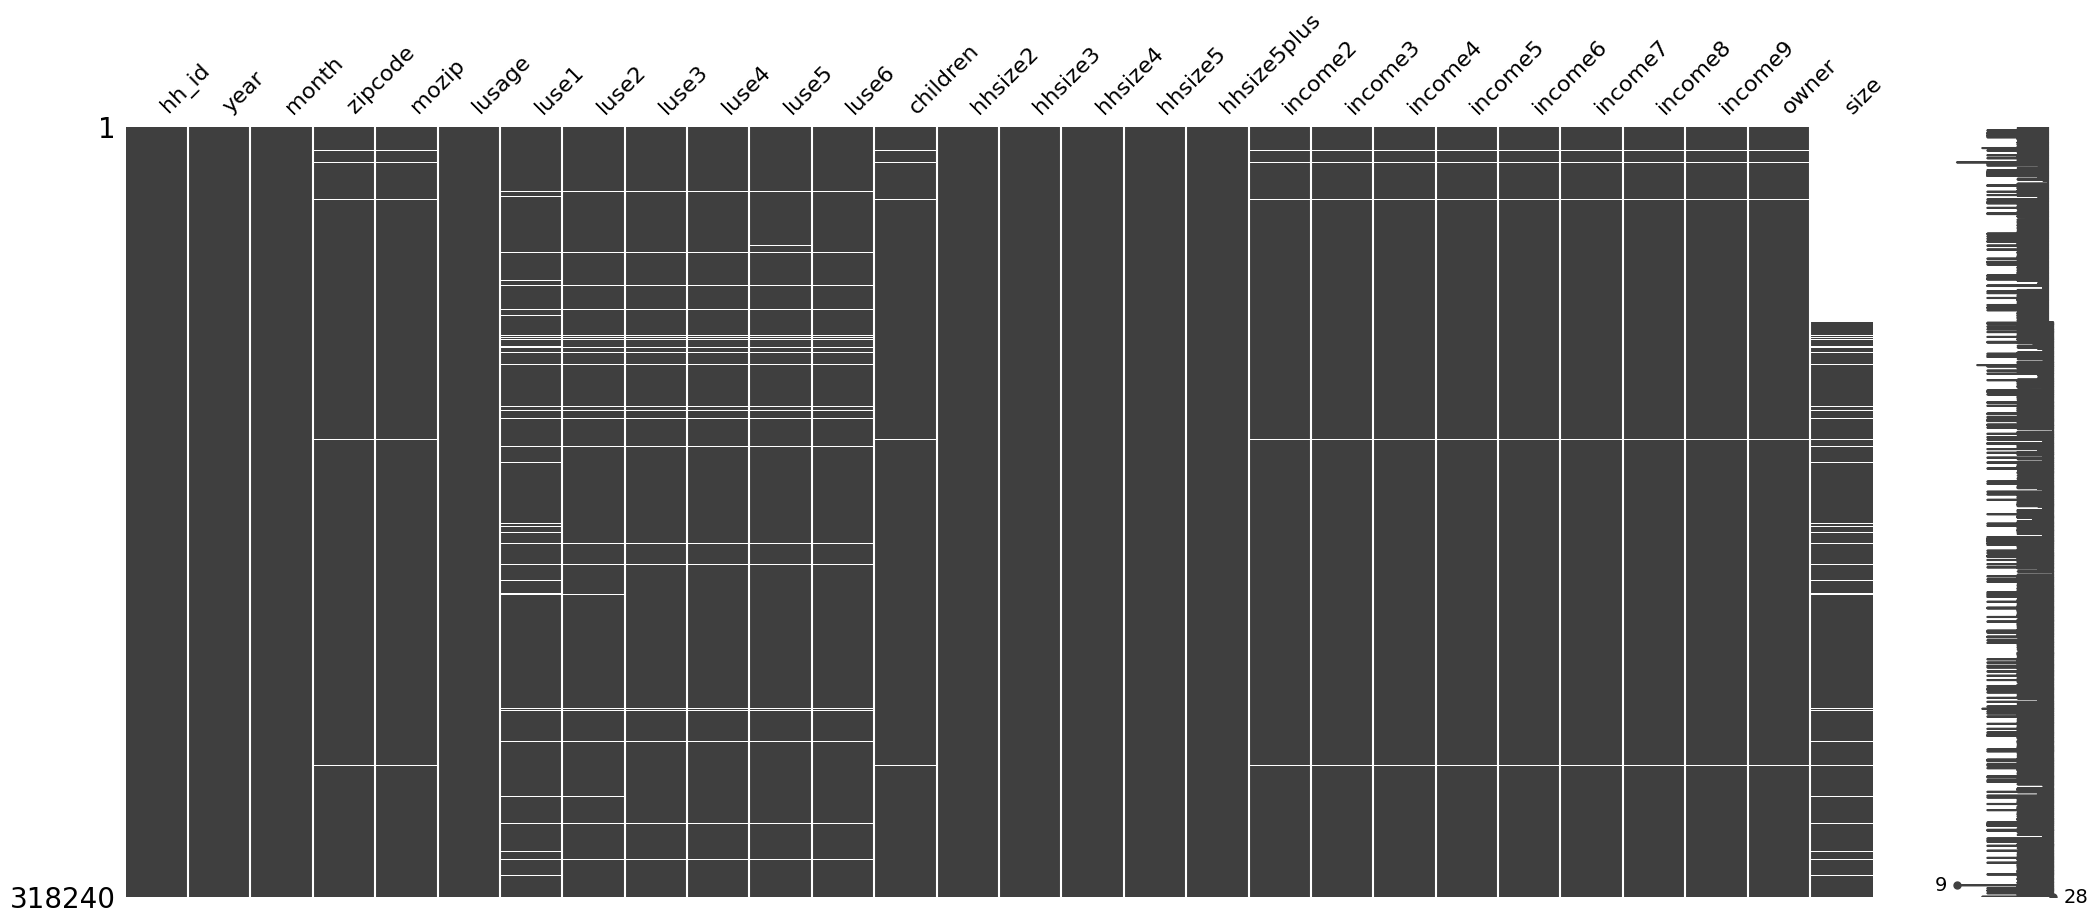

In [2]:
data = pd.read_csv('imputation_test.csv')
msno.matrix(data)

In [3]:
w = np.where(data['size'].notnull())

In [4]:
sim_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
temp  = data.copy()
temp = pd.DataFrame(sim_imputer.fit_transform(temp))

sub_data = temp.loc[w[0][0]: data.shape[0]]
sub_data.columns = data.columns

In [6]:
new_sub_data = pd.DataFrame(sim_imputer.fit_transform(temp.loc[w[0][0] : data.shape[0]]))
new_sub_data.columns = data.columns

In [20]:
X_train = new_sub_data.loc[37600:data.shape[0], new_sub_data.columns != 'size'].values
y_train = new_sub_data.loc[37600:data.shape[0], new_sub_data.columns == 'size'].values
X_test = new_sub_data.loc[0:37599, new_sub_data.columns != 'size'].values
y_test = new_sub_data.loc[0:37599, new_sub_data.columns == 'size'].values



In [22]:
standard_scaler = preprocessing.StandardScaler()
X_train_s = standard_scaler.fit_transform(X_train)
X_test_s = standard_scaler.fit_transform(X_test)

regressor = RandomForestRegressor()
regressor = regressor.fit(X_train_s, y_train.ravel())
pred = regressor.predict(X_test_s)

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
rms_rf = mean_squared_error(y_test, pred)
rms_rf

2200452.4551036274

In [25]:
from sklearn.impute import KNNImputer

In [91]:
impute_sub_data = sub_data.copy()
k = impute_sub_data[0:37600].copy()
p = impute_sub_data[37600:data.shape[0]].copy()

k['size'] = np.nan


impute_sub_data = [k, p]

In [95]:
impute_sub_data = pd.concat([k, p])

In [96]:
impute_sub_data

,hh_id,year,month,zipcode,mozip,lusage,luse1,luse2,luse3,luse4,...,income2,income3,income4,income5,income6,income7,income8,income9,owner,size
80640,12001.0,2010.0,4.0,42.0,425.0,5.662891,5.869688,5.768675,5.677545,5.702897,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN
80641,12001.0,2010.0,5.0,42.0,426.0,5.658881,5.869688,5.768675,5.677545,5.702897,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN
80642,12001.0,2010.0,6.0,42.0,427.0,5.638068,5.869688,5.768675,5.677545,5.702897,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN
80643,12001.0,2010.0,7.0,42.0,428.0,5.578601,5.869688,5.768675,5.677545,5.702897,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN
80644,12001.0,2010.0,8.0,42.0,429.0,5.410375,5.869688,5.768675,5.677545,5.702897,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318235,47356.0,2011.0,4.0,50.0,515.0,6.791299,6.696123,6.721847,6.800592,6.955112,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12490.0
318236,47356.0,2011.0,5.0,50.0,516.0,6.949129,6.696123,6.721847,6.800592,6.955112,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12490.0
318237,47356.0,2011.0,6.0,50.0,517.0,7.010714,6.696123,6.721847,6.800592,6.955112,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12490.0
318238,47356.0,2011.0,7.0,50.0,518.0,7.193545,6.696123,6.721847,6.800592,6.955112,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12490.0


In [97]:
knn_imputer = KNNImputer(n_neighbors=2)
imputed_sub_data = pd.DataFrame(knn_imputer.fit_transform(impute_sub_data))
imputed_sub_data.columns = data.columns


In [98]:
y_imputed = imputed_sub_data.loc[0:37599, new_sub_data.columns == 'size'].values

In [99]:
rms_knn = mean_squared_error(y_test, y_imputed)
rms_knn

45759406.413430855

In [100]:
corr = data.corr()

In [ ]:
corr

In [ ]:
mean_corr = corr['size'].values.mean()
mean_corr

In [ ]:
new_columns = [col for col in data.columns if abs(corr['size'][col]) >= mean_corr]
new_columns

In [ ]:
reduced_data = data[new_columns]
reduced_data

In [ ]:
temp = reduced_data.copy()

temp = pd.DataFrame(sim_imputer.fit_transform(temp))

sub_data = temp.loc[w[0][0]: data.shape[0]]
sub_data.columns = reduced_data.columns

In [ ]:
new_sub_data = pd.DataFrame(sim_imputer.fit_transform(temp.loc[w[0][0] : data.shape[0]]))
new_sub_data.columns = reduced_data.columns

In [ ]:
new_miss_data = pd.DataFrame(sim_imputer.fit_transform(temp.loc[w[0][0] : data.shape[0]]))
new_miss_data.columns = reduced_data.columns

In [ ]:
X_train = new_sub_data.loc[37600:data.shape[0], new_sub_data.columns != 'size'].values
y_train = new_sub_data.loc[37600:data.shape[0], new_sub_data.columns == 'size'].values
X_test = new_sub_data.loc[0:37599, new_sub_data.columns != 'size'].values
y_test = new_sub_data.loc[0:37599, new_sub_data.columns == 'size'].values

In [ ]:
X_train_s = standard_scaler.fit_transform(X_train)
X_test_s = standard_scaler.fit_transform(X_test)

regressor = RandomForestRegressor()
regressor = regressor.fit(X_train_s, y_train.ravel())
pred = regressor.predict(X_test_s)

In [ ]:
reduced_rms_rf = mean_squared_error(y_test, pred)
reduced_rms_rf

In [ ]:
impute_sub_data = new_sub_data.copy()
k = impute_sub_data[0:37600].copy()
p = impute_sub_data[37600:data.shape[0]].copy()

In [ ]:
k['size'] = np.nan
impute_sub_data = pd.concat([k, p])

In [ ]:
knn_imputer = KNNImputer(n_neighbors=2)
imputed_sub_data = pd.DataFrame(knn_imputer.fit_transform(impute_sub_data))
imputed_sub_data.columns = reduced_data.columns

In [ ]:
y_reduced_imputed = imputed_sub_data.loc[0:37599, new_sub_data.columns == 'size'].values
rms_knn = mean_squared_error(y_test, y_reduced_imputed)
rms_knn

In [ ]:
temp = reduced_data.copy()
temp = pd.DataFrame(sim_imputer.fit_transform(temp))

reduced_sub_data = temp.loc[0:w[0][0]-1]
reduced_sub_data.columns = reduced_data.column

In [ ]:
X_final_test = reduced_sub_data.loc[:, reduced_sub_data.columns != 'size'].values
X_final_test_s = standard_scaler.fit_transform(X_final_test)

In [ ]:
pred = regressor.predict(X_final_test_s)
pred